# bike rentals

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from ast import literal_eval

In [3]:
def get_results(exp, path):
    all_cols = cols = [ 'gain', 'permutation_train', 'permutation_test',
       'shap_train', 'shap_test']
    our_cols = [ 'gain', 'permutation_train', 'permutation_test']
    cols = our_cols if exp.startswith('Ours') else all_cols
    df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
    results = pd.DataFrame()
    for col in cols:
        results[col] = pd.Series(df.loc[0,col])
    return results

paths = {
    'Lgbm' :"lgbm/lgbm_vanilla.csv",
    'Catboost' :"catboost/catboost_vanilla.csv",
    "Ours_kfold" :"ours/ours_Kfold.csv",
     "Ours_Vanilla" :"ours/ours_CartVanilla.csv",
    "Sklearn_Mean_Imputing" : "sklearn/sklearn_mean_imputing.csv",
    "Sklearn_One_Hot" : "sklearn/sklearn_one_hot.csv",
    'Xgboost_Mean_Imputing': "xgboost/xgboost_mean_imputing.csv",
    'Xgboost_One_Hot': "xgboost/xgboost_one_hot.csv"
    
    
}

In [4]:
# df = pd.read_csv("results/experiments_results/ours/ours_CartVanilla.csv", converters = {'gain': literal_eval})

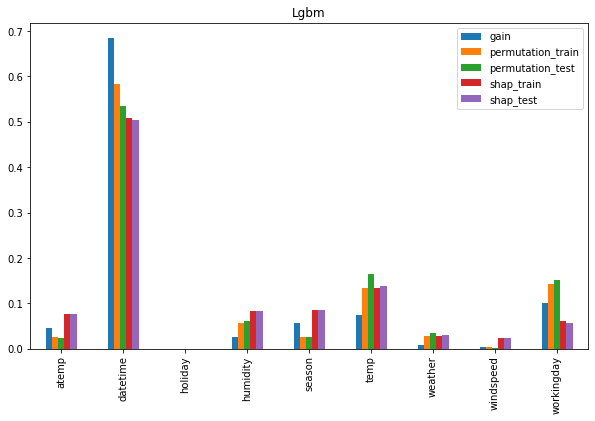

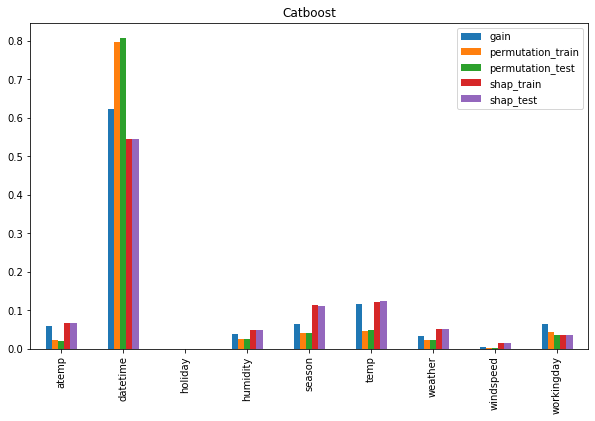

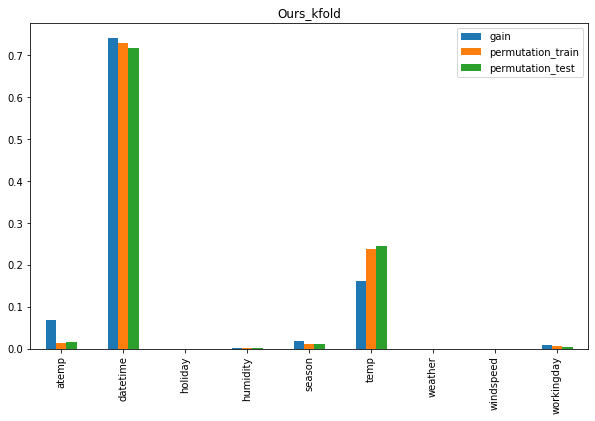

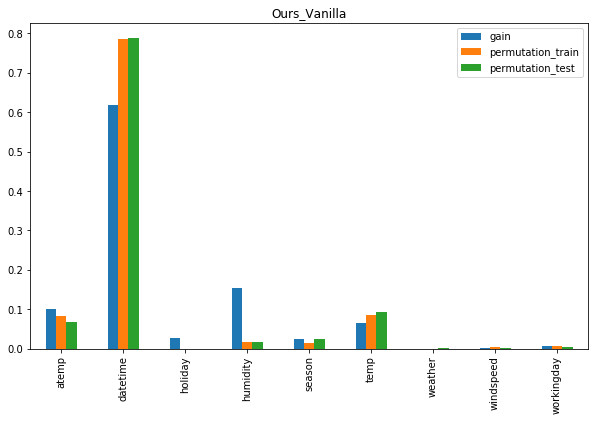

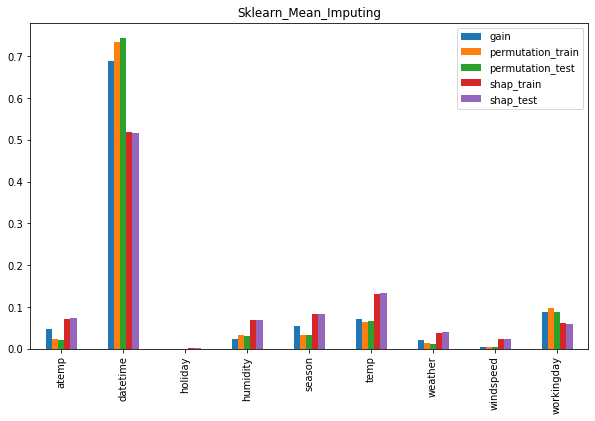

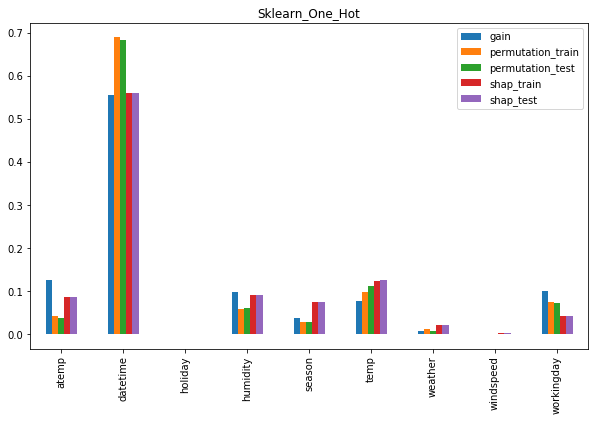

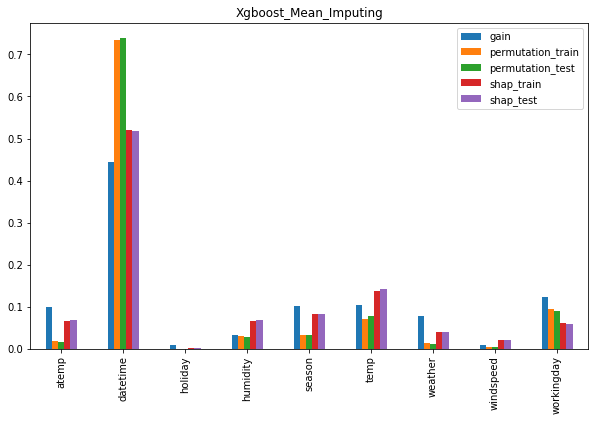

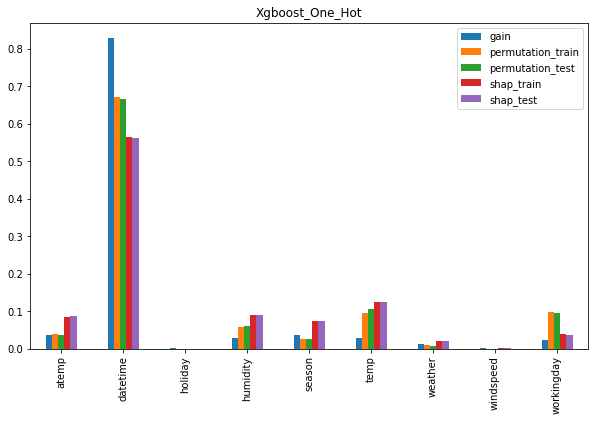

In [5]:
for k, v in paths.items():
    try: 
        results = get_results(k,v)
        results = results.sort_index()
        results.plot(kind = 'bar', figsize = (10,6), title = k)
        plt.plot()
    except:
        pass

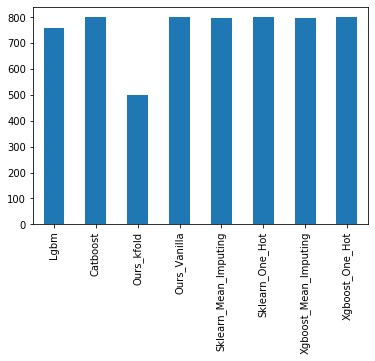

In [6]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['nleaves'][0]
pd.Series(results).plot(kind = 'bar')

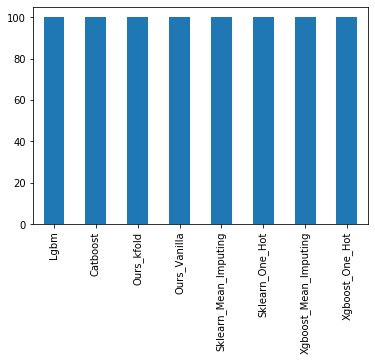

In [7]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['ntrees'][0]
pd.Series(results).plot(kind = 'bar')

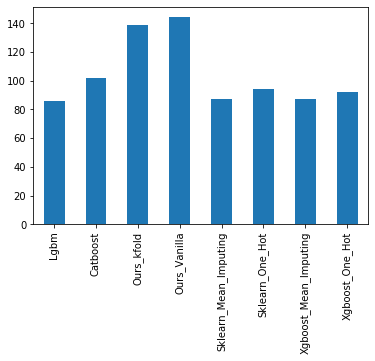

In [8]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['rmse'][0]
pd.Series(results).plot(kind = 'bar')